### **Imports**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf, plot_acf, pacf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

sns.set_theme(palette='bright')

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [4]:
df = pd.read_csv('datasets/time_series_df_resampled.csv')
df.head()

,month_beginning,month_total,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides
0,2001-01-01,86628.776978,3430.124460,1568.921583,978.086331
1,2001-02-01,80480.561151,3500.872662,1560.342446,1055.597122
2,2001-03-01,90980.474820,3540.015827,1743.936691,1095.145324
3,2001-04-01,86597.215827,3526.564029,1723.307194,1129.257554
4,2001-05-01,92643.000000,3613.837410,1753.089928,1225.258993


In [5]:
df.set_index('month_beginning', inplace=True)
df.index=pd.DatetimeIndex(df.index)
df.head()

,month_total,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides
month_beginning,,,,
2001-01-01,86628.776978,3430.124460,1568.921583,978.086331
2001-02-01,80480.561151,3500.872662,1560.342446,1055.597122
2001-03-01,90980.474820,3540.015827,1743.936691,1095.145324
2001-04-01,86597.215827,3526.564029,1723.307194,1129.257554
2001-05-01,92643.000000,3613.837410,1753.089928,1225.258993


In [6]:
# Code modified from code written by Matthew Garton
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    plt.figure(figsize=(18,9))

    for col in cols:

        plt.plot(df[col])
        
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

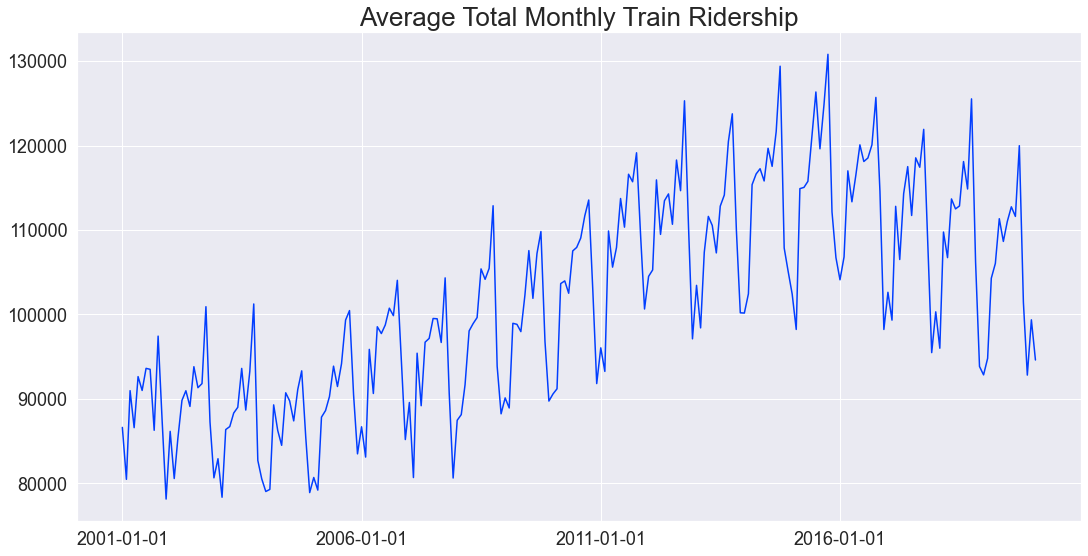

In [7]:
# Generate a time plot of our data.
plot_series(df, ['month_total'], 
            title = 'Average Total Monthly Train Ridership', steps=60)

In [8]:
df['first_diff_total']=df['month_total'].diff(1)

In [9]:
df['second_diff_total']=df['month_total'].diff(1).diff(1)

In [10]:
# Code written by Joseph Nelson 
# Improved by Hovanes Gasparian
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [11]:
print(f"Stationarity of month total:\n{interpret_dftest(adfuller(df['month_total']))}")
print()
print(f"Stationarity of first-differenced month total:\n{interpret_dftest(adfuller(df['first_diff_total'].dropna()))}")
print()
print(f"Stationarity of second-differenced month total:\n{interpret_dftest(adfuller(df['second_diff_total'].dropna()))}")

Stationarity of month total:
Test Statistic    -1.484788
p-value            0.541023
Lag Used          14.000000
dtype: float64

Stationarity of first-differenced month total:
Test Statistic    -3.342890
p-value            0.013067
Lag Used          13.000000
dtype: float64

Stationarity of second-differenced month total:
Test Statistic   -1.609010e+01
p-value           5.264628e-29
Lag Used          1.200000e+01
dtype: float64


In [12]:
df['first_diff_weekday']=df['avg_weekday_rides'].diff(1)
df['second_diff_weekday']=df['avg_weekday_rides'].diff(1).diff(1)

In [13]:
print(f"Stationarity of Weekday Avg:\n{interpret_dftest(adfuller(df['avg_weekday_rides']))}")
print()
print(f"Stationarity of first-differenced Weekday Avg:\n{interpret_dftest(adfuller(df['first_diff_weekday'].dropna()))}")
print()
print(f"Stationarity of second-differenced Weekday Avg:\n{interpret_dftest(adfuller(df['second_diff_weekday'].dropna()))}")

Stationarity of Weekday Avg:
Test Statistic    -1.189937
p-value            0.677910
Lag Used          15.000000
dtype: float64

Stationarity of first-differenced Weekday Avg:
Test Statistic    -3.614980
p-value            0.005481
Lag Used          14.000000
dtype: float64

Stationarity of second-differenced Weekday Avg:
Test Statistic   -8.378333e+00
p-value           2.550053e-13
Lag Used          1.400000e+01
dtype: float64


In [14]:
df['first_diff_saturday']=df['avg_saturday_rides'].diff(1)
df['second_diff_saturday']=df['avg_saturday_rides'].diff(1).diff(1)

In [15]:
print(f"Stationarity of Saturday Avg:\n{interpret_dftest(adfuller(df['avg_saturday_rides']))}")
print()
print(f"Stationarity of first-differenced Saturday Avg:\n{interpret_dftest(adfuller(df['first_diff_saturday'].dropna()))}")
print()
print(f"Stationarity of second-differenced Saturday Avg:\n{interpret_dftest(adfuller(df['second_diff_saturday'].dropna()))}")

Stationarity of Saturday Avg:
Test Statistic    -1.511771
p-value            0.527680
Lag Used          15.000000
dtype: float64

Stationarity of first-differenced Saturday Avg:
Test Statistic    -2.715136
p-value            0.071456
Lag Used          15.000000
dtype: float64

Stationarity of second-differenced Saturday Avg:
Test Statistic   -1.139349e+01
p-value           7.961815e-21
Lag Used          1.400000e+01
dtype: float64


In [16]:
df['first_diff_sunday_holiday']=df['avg_sunday-holiday_rides'].diff(1)
df['second_diff_sunday_holiday']=df['avg_sunday-holiday_rides'].diff(1).diff(1)

In [17]:
print(f"Stationarity of Sunday & Holiday Avg:\n{interpret_dftest(adfuller(df['avg_sunday-holiday_rides']))}")
print()
print(f"Stationarity of first-differenced Sunday & Holiday Avg:\n{interpret_dftest(adfuller(df['first_diff_sunday_holiday'].dropna()))}")
print()
print(f"Stationarity of second-differenced Sunday & Holiday Avg:\n{interpret_dftest(adfuller(df['second_diff_sunday_holiday'].dropna()))}")

Stationarity of Sunday & Holiday Avg:
Test Statistic    -1.615544
p-value            0.475066
Lag Used          14.000000
dtype: float64

Stationarity of first-differenced Sunday & Holiday Avg:
Test Statistic    -2.834562
p-value            0.053504
Lag Used          15.000000
dtype: float64

Stationarity of second-differenced Sunday & Holiday Avg:
Test Statistic   -1.173251e+01
p-value           1.331267e-21
Lag Used          1.400000e+01
dtype: float64


In [18]:
df_var = df[['first_diff_total', 'first_diff_weekday', 'second_diff_saturday', 'second_diff_sunday_holiday']].copy()
df_var.dropna(inplace = True)

In [19]:
train, test = train_test_split(df_var, test_size = 0.25, shuffle = False)

In [20]:
model_var = VAR(train)

C:\Users\Brianna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [21]:
var_model = model_var.fit(maxlags=10,ic='aic')

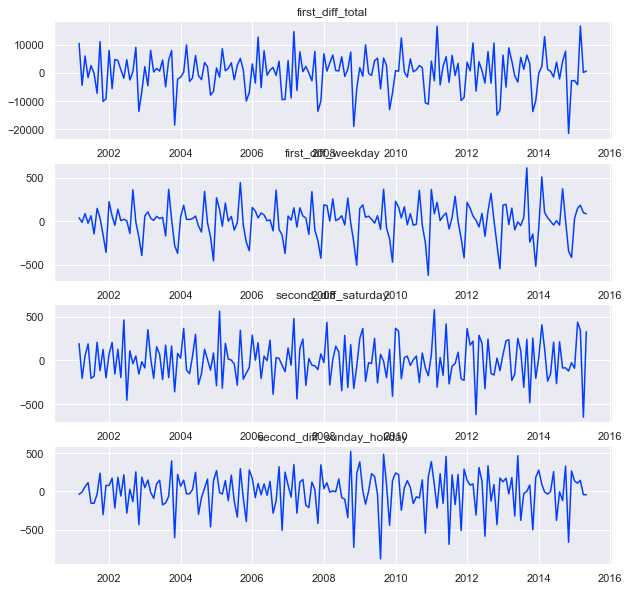

In [22]:
var_model.plot();

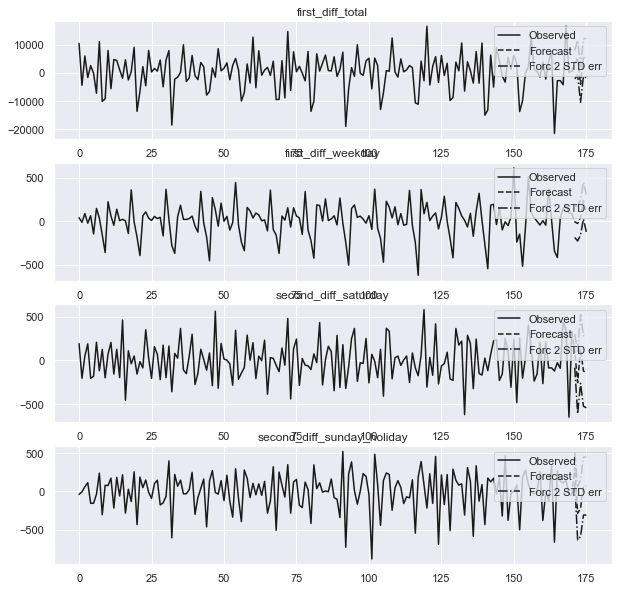

In [27]:
var_model.plot_forecast(5)
plt.savefig('data_viz/short_forecast_var_train.png');

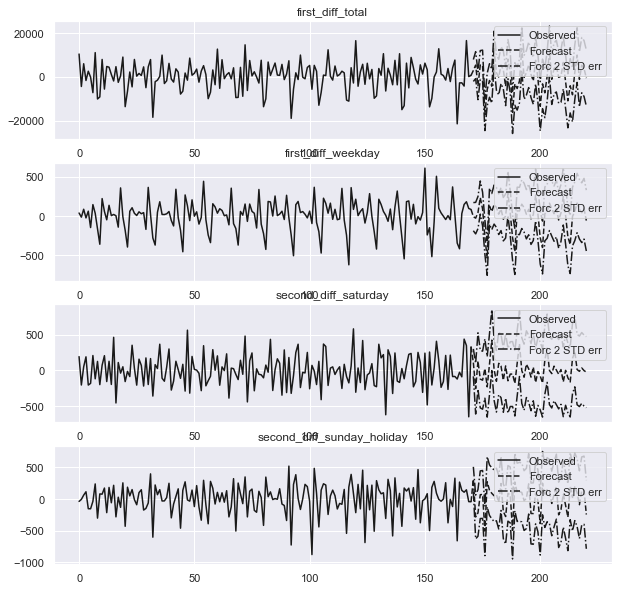

In [28]:
var_model.plot_forecast(50)
plt.savefig('data_viz/long_forecast_var_train.png');

In [25]:
forecast = var_model.forecast(train.values, len(test))

In [26]:
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 4)}')

The test MSE on the first_diff_total data is: 39278153.1624
The test MSE on the first_diff_weekday data is: 13559.8613
The test MSE on the second_diff_saturday data is: 57117.2885
The test MSE on the second_diff_sunday_holiday data is: 59747.7861
